<a href="https://colab.research.google.com/github/JaberAhmad555/CSE422_AI/blob/main/Employement_Attriation_using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [ ]:
#1.Load dataset
df = pd.read_csv('employee attriation dataset.csv')

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")



Dataset loaded successfully!
Dataset shape: (1677, 35)


In [ ]:
#2.Dataset description
# Basic information about the dataset
print(f"\nNumber of features: {df.shape[1] - 1} (excluding target)")
print(f"Number of data points: {df.shape[0]}")
print(f"Target variable: Attrition")
print(f"Problem type: Binary Classification (predicting employee attrition)")

# Display first few rows
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Data types
print("\nData types of features:")
print(df.dtypes)

# Statistical summary
print("\nStatistical Summary:")
print(df.describe())

# Check for unique values in each column
print("\nUnique values in each column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

# Identify categorical and numerical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\nCategorical features ({len(categorical_features)}): {categorical_features}")
print(f"Numerical features ({len(numerical_features)}): {numerical_features}")




Number of features: 34 (excluding target)
Number of data points: 1677
Target variable: Attrition
Problem type: Binary Classification (predicting employee attrition)

First 5 rows of the dataset:
   id  Age     BusinessTravel  DailyRate              Department  \
0   0   36  Travel_Frequently        599  Research & Development   
1   1   35      Travel_Rarely        921                   Sales   
2   2   32      Travel_Rarely        718                   Sales   
3   3   38      Travel_Rarely       1488  Research & Development   
4   4   50      Travel_Rarely       1017  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  \
0                24          3        Medical              1   
1                 8          3          Other              1   
2                26          3      Marketing              1   
3                 2          3        Medical              1   
4                 5          4        Medical              1   

   Environ

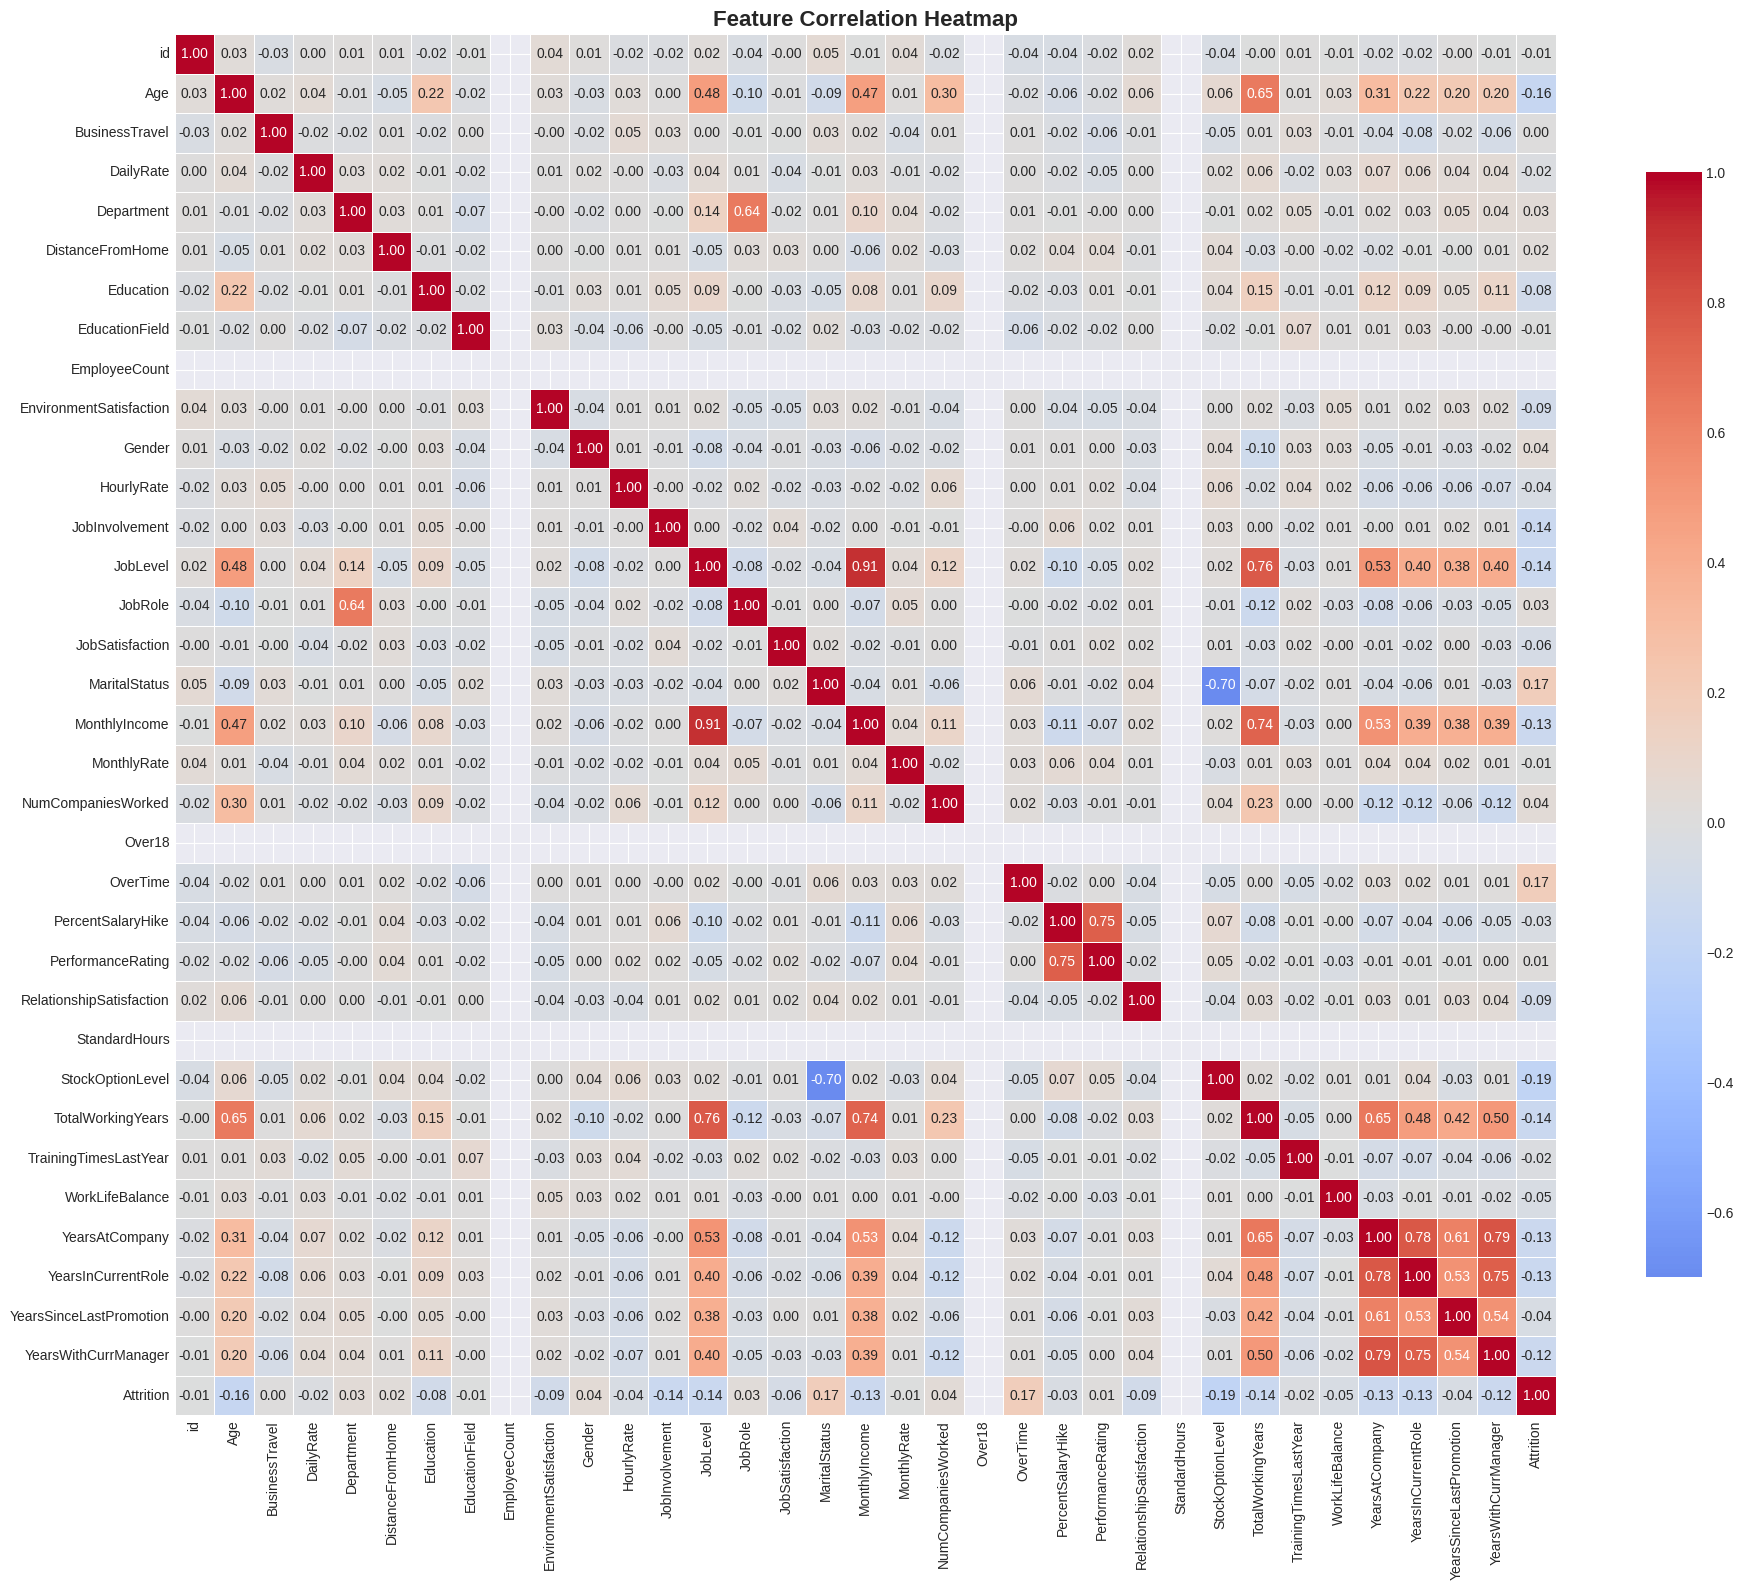


Top features correlated with Attrition:
Attrition             1.000000
MaritalStatus         0.174505
OverTime              0.173965
Gender                0.042434
NumCompaniesWorked    0.037127
Department            0.031996
JobRole               0.027869
DistanceFromHome      0.024741
PerformanceRating     0.013666
BusinessTravel        0.000552
Name: Attrition, dtype: float64


In [ ]:
#correlation
# First, we need to encode categorical variables for correlation
df_encoded = df.copy()
label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Calculate correlation matrix
correlation_matrix = df_encoded.corr()

# Create correlation heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Find highly correlated features with Attrition
attrition_corr = correlation_matrix['Attrition'].sort_values(ascending=False)
print("\nTop features correlated with Attrition:")
print(attrition_corr.head(10))



Class Distribution:
Attrition
0    1477
1     200
Name: count, dtype: int64

Class Ratio: 7.38:1


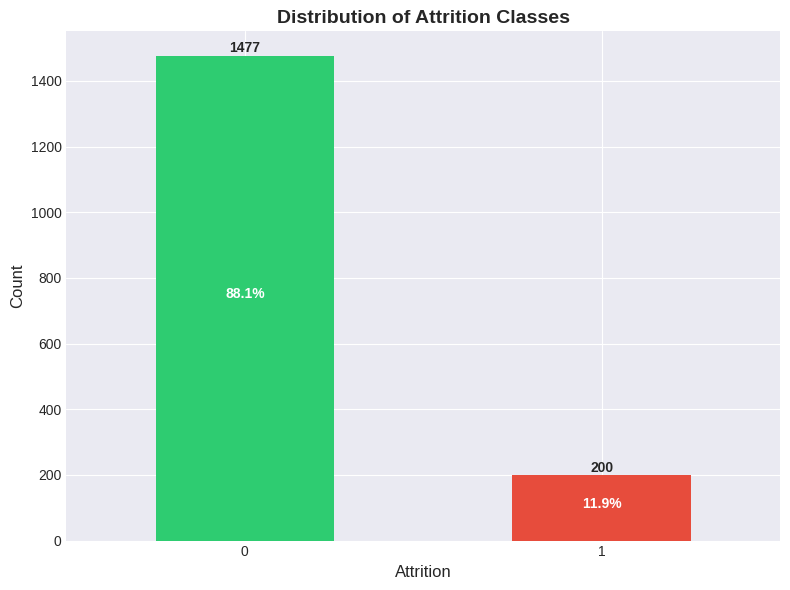

In [ ]:
#imbalance dataset check
# Check class distribution
class_distribution = df['Attrition'].value_counts()
print("\nClass Distribution:")
print(class_distribution)
print(f"\nClass Ratio: {class_distribution[0]/class_distribution[1]:.2f}:1")

# Visualize class imbalance
plt.figure(figsize=(8, 6))
ax = class_distribution.plot(kind='bar', color=['#2ecc71', '#e74c3c'])
plt.title('Distribution of Attrition Classes', fontsize=14, fontweight='bold')
plt.xlabel('Attrition', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)

# Add value labels on bars
for i, v in enumerate(class_distribution):
    ax.text(i, v + 10, str(v), ha='center', fontweight='bold')

# Add percentage labels
total = class_distribution.sum()
for i, v in enumerate(class_distribution):
    percentage = (v/total)*100
    ax.text(i, v/2, f'{percentage:.1f}%', ha='center', color='white', fontweight='bold')

plt.tight_layout()
plt.show()

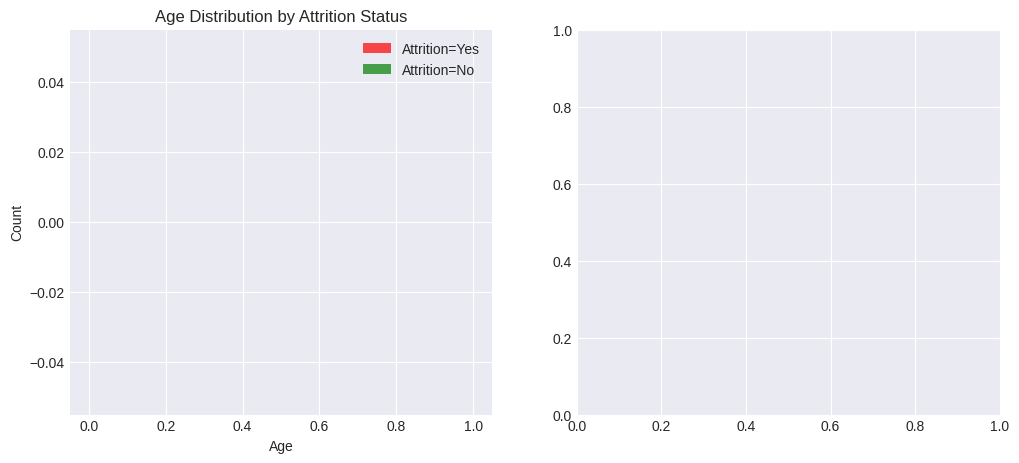

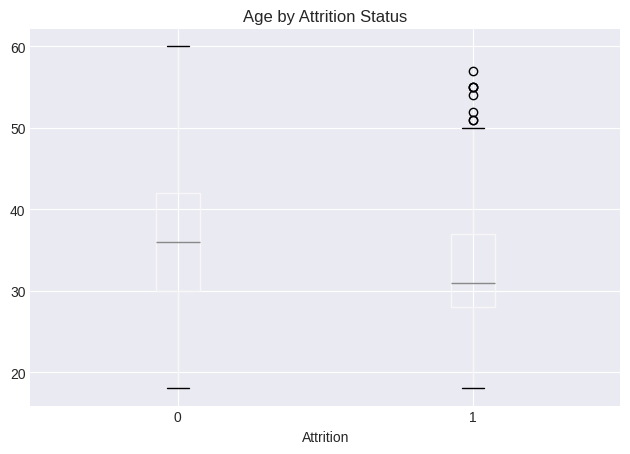

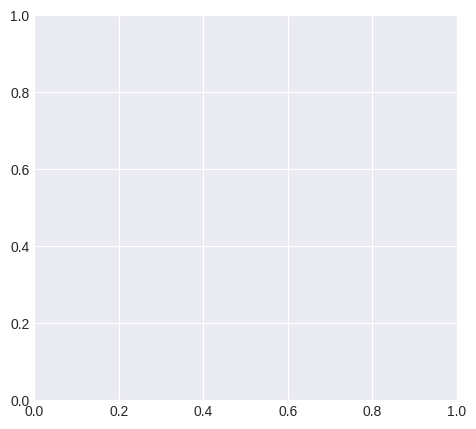

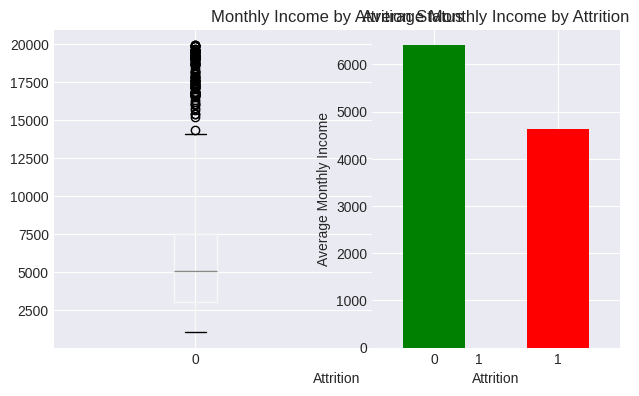

<Figure size 1000x600 with 0 Axes>

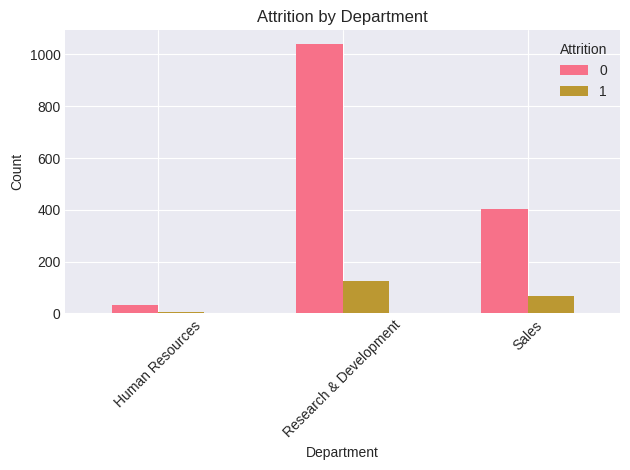

<Figure size 1000x600 with 0 Axes>

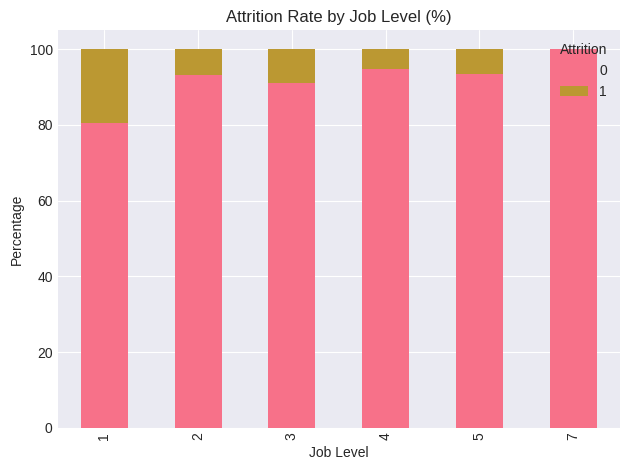

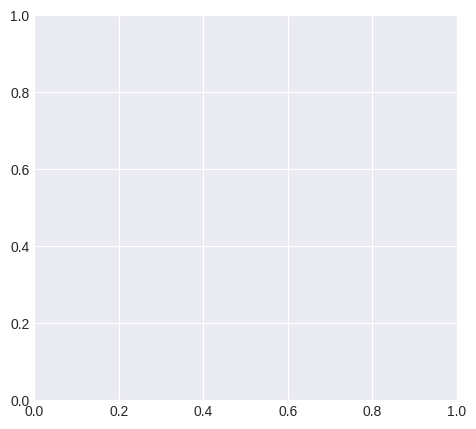

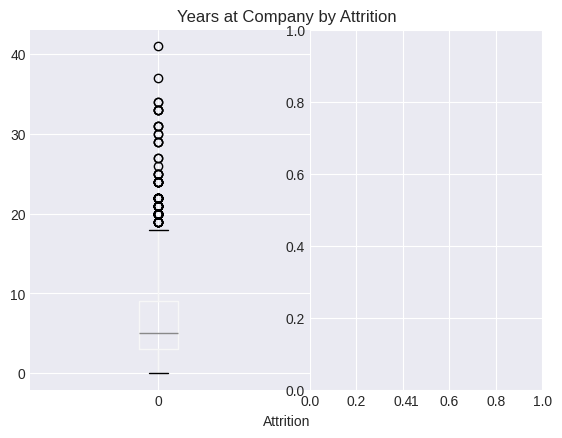

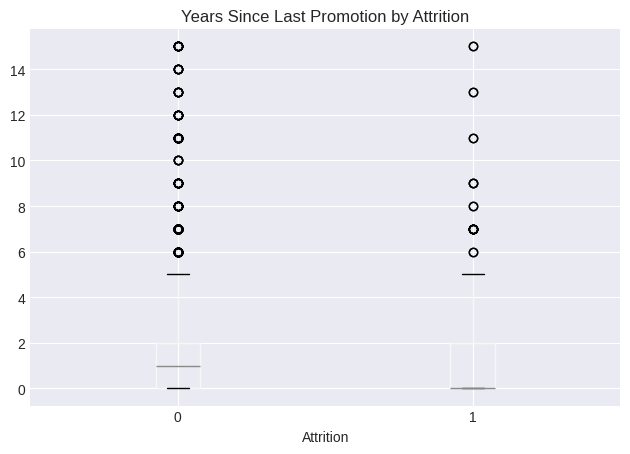

In [ ]:
#EDA
# 1. Age distribution by Attrition
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df[df['Attrition'] == 'Yes']['Age'].hist(bins=20, alpha=0.7, label='Attrition=Yes', color='red')
df[df['Attrition'] == 'No']['Age'].hist(bins=20, alpha=0.7, label='Attrition=No', color='green')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution by Attrition Status')
plt.legend()

plt.subplot(1, 2, 2)
df.boxplot(column='Age', by='Attrition')
plt.suptitle('')
plt.title('Age by Attrition Status')
plt.tight_layout()
plt.show()

# 2. Monthly Income analysis
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df.boxplot(column='MonthlyIncome', by='Attrition')
plt.suptitle('')
plt.title('Monthly Income by Attrition Status')

plt.subplot(1, 2, 2)
df.groupby('Attrition')['MonthlyIncome'].mean().plot(kind='bar', color=['green', 'red'])
plt.title('Average Monthly Income by Attrition')
plt.ylabel('Average Monthly Income')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 3. Department-wise attrition
plt.figure(figsize=(10, 6))
pd.crosstab(df['Department'], df['Attrition']).plot(kind='bar', stacked=False)
plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()

# 4. Job Level analysis
plt.figure(figsize=(10, 6))
attrition_by_joblevel = pd.crosstab(df['JobLevel'], df['Attrition'], normalize='index') * 100
attrition_by_joblevel.plot(kind='bar', stacked=True)
plt.title('Attrition Rate by Job Level (%)')
plt.xlabel('Job Level')
plt.ylabel('Percentage')
plt.legend(title='Attrition', loc='upper right')
plt.tight_layout()
plt.show()

# 5. Years at Company analysis
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df.boxplot(column='YearsAtCompany', by='Attrition')
plt.suptitle('')
plt.title('Years at Company by Attrition')

plt.subplot(1, 2, 2)
df.boxplot(column='YearsSinceLastPromotion', by='Attrition')
plt.suptitle('')
plt.title('Years Since Last Promotion by Attrition')
plt.tight_layout()
plt.show()


In [ ]:
#3.Dataset Preprocessing
# Check for missing values
print("\nMissing Values Check:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values found!")

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")

# Prepare features and target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Encode categorical variables
print("\n" + "="*50)
print("ENCODING CATEGORICAL VARIABLES")
print("="*50)

# Separate categorical and numerical columns
cat_columns = X.select_dtypes(include=['object']).columns
num_columns = X.select_dtypes(include=['int64', 'float64']).columns

print(f"\nCategorical columns to encode: {list(cat_columns)}")

# Create a copy for encoding
X_encoded = X.copy()

# Label encoding for categorical features
label_encoders_X = {}
for col in cat_columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X[col].astype(str))
    label_encoders_X[col] = le
    print(f"Encoded {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Encode target variable
le_y = LabelEncoder()
y_encoded = le_y.fit_transform(y)
print(f"\nTarget encoding - Attrition: {dict(zip(le_y.classes_, le_y.transform(le_y.classes_)))}")



Missing Values Check:
No missing values found!

Duplicate rows: 0

ENCODING CATEGORICAL VARIABLES

Categorical columns to encode: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
Encoded BusinessTravel: {'Non-Travel': np.int64(0), 'Travel_Frequently': np.int64(1), 'Travel_Rarely': np.int64(2)}
Encoded Department: {'Human Resources': np.int64(0), 'Research & Development': np.int64(1), 'Sales': np.int64(2)}
Encoded EducationField: {'Human Resources': np.int64(0), 'Life Sciences': np.int64(1), 'Marketing': np.int64(2), 'Medical': np.int64(3), 'Other': np.int64(4), 'Technical Degree': np.int64(5)}
Encoded Gender: {'Female': np.int64(0), 'Male': np.int64(1)}
Encoded JobRole: {'Healthcare Representative': np.int64(0), 'Human Resources': np.int64(1), 'Laboratory Technician': np.int64(2), 'Manager': np.int64(3), 'Manufacturing Director': np.int64(4), 'Research Director': np.int64(5), 'Research Scientist': np.int64(6), 'Sales Execut

In [ ]:
#feature scaling
print("\n" + "="*50)
print("FEATURE SCALING")
print("="*50)

# Check if scaling is needed
print("\nFeature ranges before scaling:")
for col in num_columns:
    print(f"{col}: [{X_encoded[col].min():.2f}, {X_encoded[col].max():.2f}]")

# Apply StandardScaler
scaler = StandardScaler()
X_scaled = X_encoded.copy()
X_scaled[num_columns] = scaler.fit_transform(X_encoded[num_columns])

print("\nFeature ranges after scaling (numerical features):")
for col in num_columns:
    print(f"{col}: [{X_scaled[col].min():.2f}, {X_scaled[col].max():.2f}]")


FEATURE SCALING

Feature ranges before scaling:
id: [0.00, 1676.00]
Age: [18.00, 60.00]
DailyRate: [107.00, 3921.00]
DistanceFromHome: [1.00, 29.00]
Education: [1.00, 15.00]
EmployeeCount: [1.00, 1.00]
EnvironmentSatisfaction: [1.00, 4.00]
HourlyRate: [30.00, 100.00]
JobInvolvement: [1.00, 4.00]
JobLevel: [1.00, 7.00]
JobSatisfaction: [1.00, 4.00]
MonthlyIncome: [1010.00, 19973.00]
MonthlyRate: [636.00, 26999.00]
NumCompaniesWorked: [0.00, 9.00]
PercentSalaryHike: [11.00, 25.00]
PerformanceRating: [3.00, 4.00]
RelationshipSatisfaction: [1.00, 4.00]
StandardHours: [80.00, 80.00]
StockOptionLevel: [0.00, 3.00]
TotalWorkingYears: [0.00, 41.00]
TrainingTimesLastYear: [0.00, 6.00]
WorkLifeBalance: [1.00, 4.00]
YearsAtCompany: [0.00, 41.00]
YearsInCurrentRole: [0.00, 18.00]
YearsSinceLastPromotion: [0.00, 15.00]
YearsWithCurrManager: [0.00, 17.00]

Feature ranges after scaling (numerical features):
id: [-1.73, 1.73]
Age: [-2.12, 2.82]
DailyRate: [-2.10, 8.09]
DistanceFromHome: [-0.98, 2.60]

In [ ]:
#4.Dataset splitting
# Use stratified split to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

print(f"\nTraining set size: {X_train.shape[0]} samples ({(X_train.shape[0]/len(X_scaled))*100:.1f}%)")
print(f"Test set size: {X_test.shape[0]} samples ({(X_test.shape[0]/len(X_scaled))*100:.1f}%)")

# Check class distribution in train and test sets
print(f"\nClass distribution in training set:")
unique, counts = np.unique(y_train, return_counts=True)
for val, count in zip(unique, counts):
    print(f"  Class {val}: {count} samples ({(count/len(y_train))*100:.1f}%)")

print(f"\nClass distribution in test set:")
unique, counts = np.unique(y_test, return_counts=True)
for val, count in zip(unique, counts):
    print(f"  Class {val}: {count} samples ({(count/len(y_test))*100:.1f}%)")




Training set size: 1173 samples (69.9%)
Test set size: 504 samples (30.1%)

Class distribution in training set:
  Class 0: 1033 samples (88.1%)
  Class 1: 140 samples (11.9%)

Class distribution in test set:
  Class 0: 444 samples (88.1%)
  Class 1: 60 samples (11.9%)


In [ ]:
#5.model training and testing
# Dictionary to store model results
results = {}

# 1. K-Nearest Neighbors (KNN)

print("Training KNN Classifier...")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
results['KNN'] = {
    'model': knn,
    'predictions': y_pred_knn,
    'accuracy': accuracy_score(y_test, y_pred_knn),
    'precision': precision_score(y_test, y_pred_knn, average='weighted'),
    'recall': recall_score(y_test, y_pred_knn, average='weighted')
}
print(f"KNN Accuracy: {results['KNN']['accuracy']:.4f}")

# 2. Decision Tree
print("\nTraining Decision Tree Classifier...")
dt = DecisionTreeClassifier(random_state=42, max_depth=10)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
results['Decision Tree'] = {
    'model': dt,
    'predictions': y_pred_dt,
    'accuracy': accuracy_score(y_test, y_pred_dt),
    'precision': precision_score(y_test, y_pred_dt, average='weighted'),
    'recall': recall_score(y_test, y_pred_dt, average='weighted')
}
print(f"Decision Tree Accuracy: {results['Decision Tree']['accuracy']:.4f}")

# 3. Logistic Regression
print("\nTraining Logistic Regression...")
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
results['Logistic Regression'] = {
    'model': lr,
    'predictions': y_pred_lr,
    'accuracy': accuracy_score(y_test, y_pred_lr),
    'precision': precision_score(y_test, y_pred_lr, average='weighted'),
    'recall': recall_score(y_test, y_pred_lr, average='weighted')
}
print(f"Logistic Regression Accuracy: {results['Logistic Regression']['accuracy']:.4f}")

# 4. Naive Bayes
print("\nTraining Naive Bayes Classifier...")
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
results['Naive Bayes'] = {
    'model': nb,
    'predictions': y_pred_nb,
    'accuracy': accuracy_score(y_test, y_pred_nb),
    'precision': precision_score(y_test, y_pred_nb, average='weighted'),
    'recall': recall_score(y_test, y_pred_nb, average='weighted')
}
print(f"Naive Bayes Accuracy: {results['Naive Bayes']['accuracy']:.4f}")

# 5. Neural Network (MLP)
print("\nTraining Neural Network (MLP)...")
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
results['Neural Network'] = {
    'model': mlp,
    'predictions': y_pred_mlp,
    'accuracy': accuracy_score(y_test, y_pred_mlp),
    'precision': precision_score(y_test, y_pred_mlp, average='weighted'),
    'recall': recall_score(y_test, y_pred_mlp, average='weighted')
}
print(f"Neural Network Accuracy: {results['Neural Network']['accuracy']:.4f}")


Training KNN Classifier...
KNN Accuracy: 0.8750

Training Decision Tree Classifier...
Decision Tree Accuracy: 0.8274

Training Logistic Regression...
Logistic Regression Accuracy: 0.8671

Training Naive Bayes Classifier...
Naive Bayes Accuracy: 0.7877

Training Neural Network (MLP)...
Neural Network Accuracy: 0.8234



K-means clustering completed with 2 clusters
Cluster distribution:
  Cluster 0: 796 samples (47.5%)
  Cluster 1: 881 samples (52.5%)


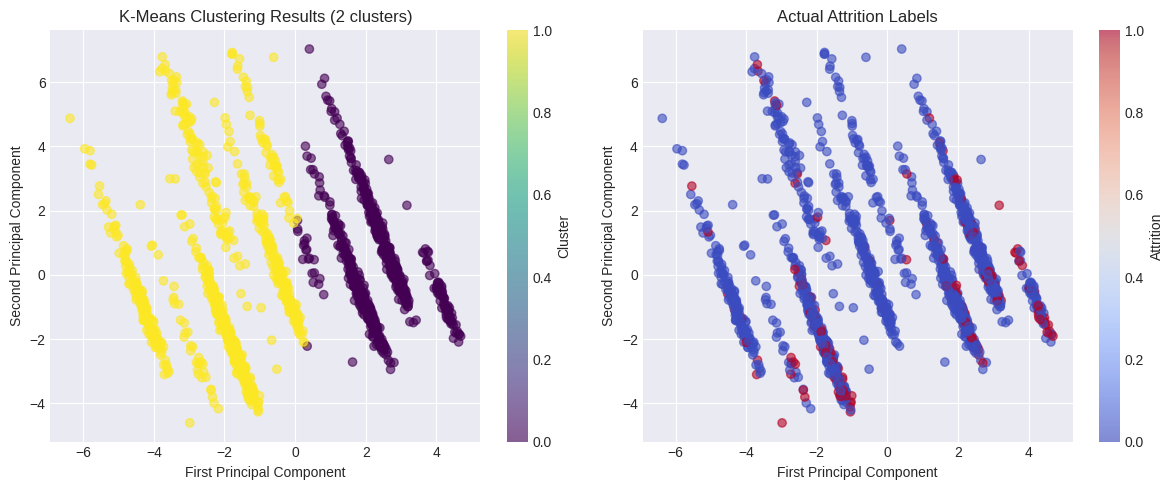


Adjusted Rand Index between clusters and actual labels: 0.0031


In [ ]:
#unsupervised learning K-means clusttering
# Perform K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

print(f"\nK-means clustering completed with 2 clusters")
print(f"Cluster distribution:")
unique, counts = np.unique(clusters, return_counts=True)
for cluster, count in zip(unique, counts):
    print(f"  Cluster {cluster}: {count} samples ({(count/len(clusters))*100:.1f}%)")

# Visualize clusters using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('K-Means Clustering Results (2 clusters)')
plt.colorbar(scatter, label='Cluster')

plt.subplot(1, 2, 2)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_encoded, cmap='coolwarm', alpha=0.6)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Actual Attrition Labels')
plt.colorbar(scatter, label='Attrition')

plt.tight_layout()
plt.show()

# Compare clusters with actual labels
from sklearn.metrics import adjusted_rand_score
ari_score = adjusted_rand_score(y_encoded, clusters)
print(f"\nAdjusted Rand Index between clusters and actual labels: {ari_score:.4f}")



Model Performance Comparison:
                 Model  Accuracy  Precision    Recall
0                  KNN  0.875000   0.828059  0.875000
2  Logistic Regression  0.867063   0.839942  0.867063
1        Decision Tree  0.827381   0.823594  0.827381
4       Neural Network  0.823413   0.819535  0.823413
3          Naive Bayes  0.787698   0.843014  0.787698


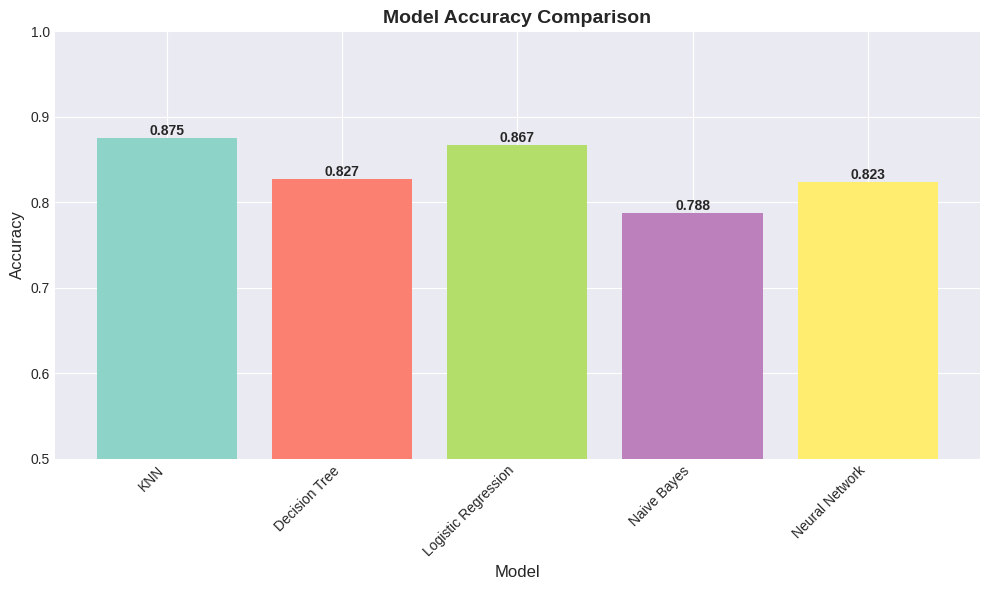

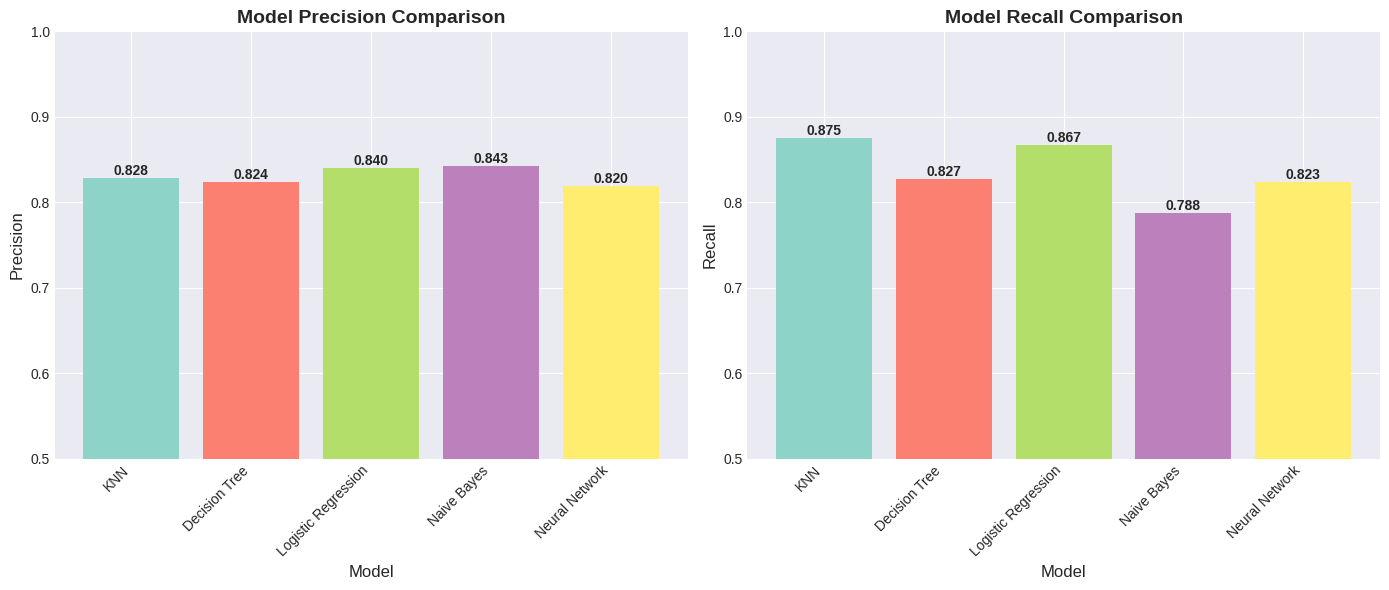

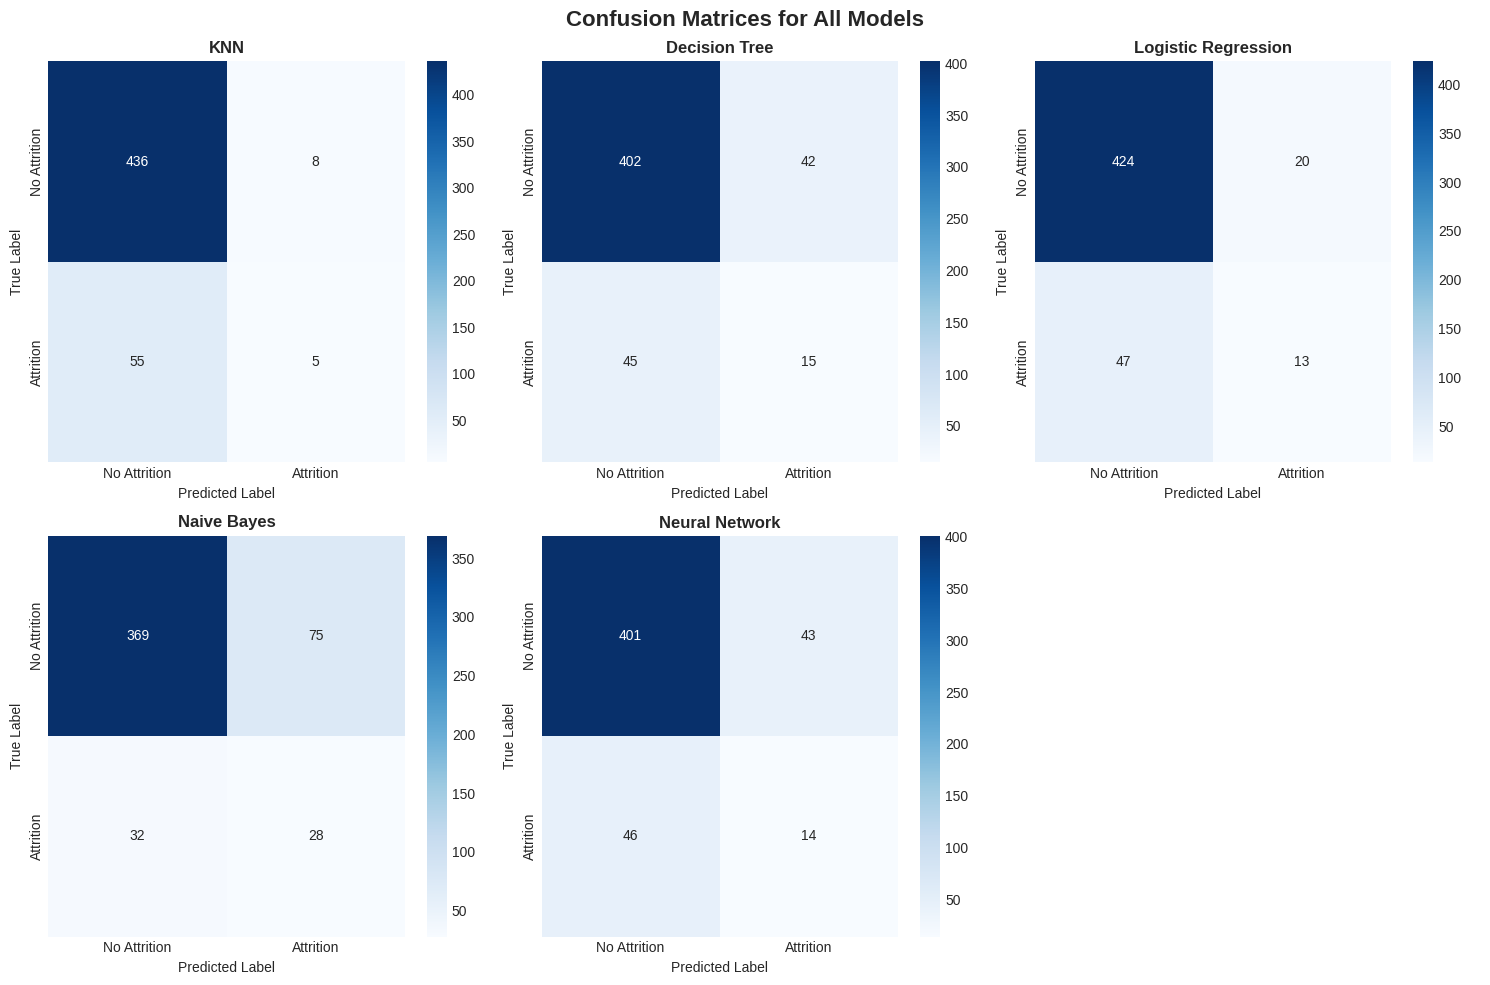

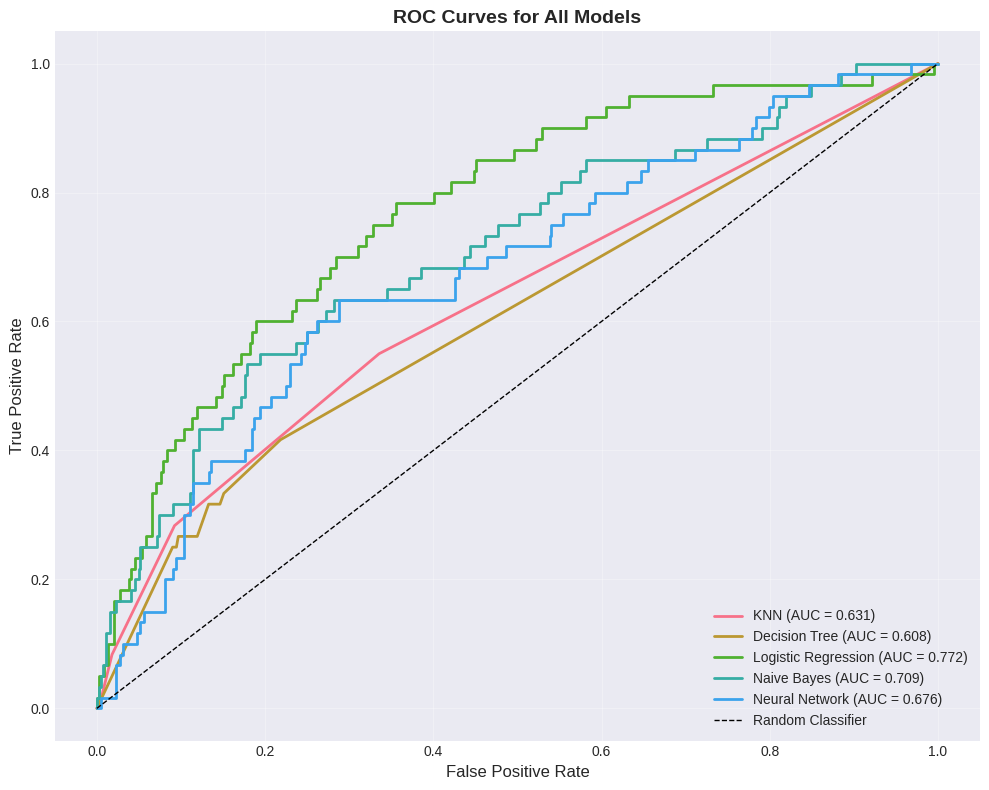


AUC Scores:
KNN: 0.6306
Decision Tree: 0.6076
Logistic Regression: 0.7721
Naive Bayes: 0.7092
Neural Network: 0.6759

DETAILED CLASSIFICATION REPORTS

KNN Classification Report:
----------------------------------------
              precision    recall  f1-score   support

No Attrition       0.89      0.98      0.93       444
   Attrition       0.38      0.08      0.14        60

    accuracy                           0.88       504
   macro avg       0.64      0.53      0.53       504
weighted avg       0.83      0.88      0.84       504


Decision Tree Classification Report:
----------------------------------------
              precision    recall  f1-score   support

No Attrition       0.90      0.91      0.90       444
   Attrition       0.26      0.25      0.26        60

    accuracy                           0.83       504
   macro avg       0.58      0.58      0.58       504
weighted avg       0.82      0.83      0.83       504


Logistic Regression Classification Report:
---

In [ ]:
#6.model comparison
# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': results.keys(),
    'Accuracy': [results[m]['accuracy'] for m in results],
    'Precision': [results[m]['precision'] for m in results],
    'Recall': [results[m]['recall'] for m in results]
})

print("\nModel Performance Comparison:")
print(comparison_df.sort_values('Accuracy', ascending=False))

# 1. Bar chart for accuracy comparison
plt.figure(figsize=(10, 6))
colors = plt.cm.Set3(np.linspace(0, 1, len(results)))
bars = plt.bar(comparison_df['Model'], comparison_df['Accuracy'], color=colors)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.ylim([0.5, 1.0])

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# 2. Precision and Recall comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Precision comparison
bars1 = ax1.bar(comparison_df['Model'], comparison_df['Precision'], color=colors)
ax1.set_xlabel('Model', fontsize=12)
ax1.set_ylabel('Precision', fontsize=12)
ax1.set_title('Model Precision Comparison', fontsize=14, fontweight='bold')
ax1.set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
ax1.set_ylim([0.5, 1.0])

for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

# Recall comparison
bars2 = ax2.bar(comparison_df['Model'], comparison_df['Recall'], color=colors)
ax2.set_xlabel('Model', fontsize=12)
ax2.set_ylabel('Recall', fontsize=12)
ax2.set_title('Model Recall Comparison', fontsize=14, fontweight='bold')
ax2.set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
ax2.set_ylim([0.5, 1.0])

for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# 3. Confusion Matrices for all models
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, (model_name, model_results) in enumerate(results.items()):
    cm = confusion_matrix(y_test, model_results['predictions'])

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                xticklabels=['No Attrition', 'Attrition'],
                yticklabels=['No Attrition', 'Attrition'])
    axes[idx].set_title(f'{model_name}', fontweight='bold')
    axes[idx].set_ylabel('True Label')
    axes[idx].set_xlabel('Predicted Label')

# Hide the last subplot if we have fewer models
if len(results) < 6:
    axes[-1].axis('off')

plt.suptitle('Confusion Matrices for All Models', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 4. ROC Curves and AUC Scores
plt.figure(figsize=(10, 8))

for model_name, model_results in results.items():
    model = model_results['model']

    # Get probabilities for positive class
    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, linewidth=2,
                label=f'{model_name} (AUC = {roc_auc:.3f})')

# Plot diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves for All Models', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate and display AUC scores
print("\nAUC Scores:")
auc_scores = {}
for model_name, model_results in results.items():
    model = model_results['model']
    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_test)[:, 1]
        auc_score = roc_auc_score(y_test, y_proba)
        auc_scores[model_name] = auc_score
        print(f"{model_name}: {auc_score:.4f}")

# 5. Detailed Classification Reports
print("\n" + "="*50)
print("DETAILED CLASSIFICATION REPORTS")
print("="*50)

for model_name, model_results in results.items():
    print(f"\n{model_name} Classification Report:")
    print("-" * 40)
    print(classification_report(y_test, model_results['predictions'],
                              target_names=['No Attrition', 'Attrition']))



Top 10 Most Important Features (Decision Tree):
                     feature  importance
17             MonthlyIncome    0.140569
18               MonthlyRate    0.085869
26          StockOptionLevel    0.066063
11                HourlyRate    0.056226
14                   JobRole    0.045321
24  RelationshipSatisfaction    0.044602
12            JobInvolvement    0.043867
28     TrainingTimesLastYear    0.043536
21                  OverTime    0.040829
30            YearsAtCompany    0.039405


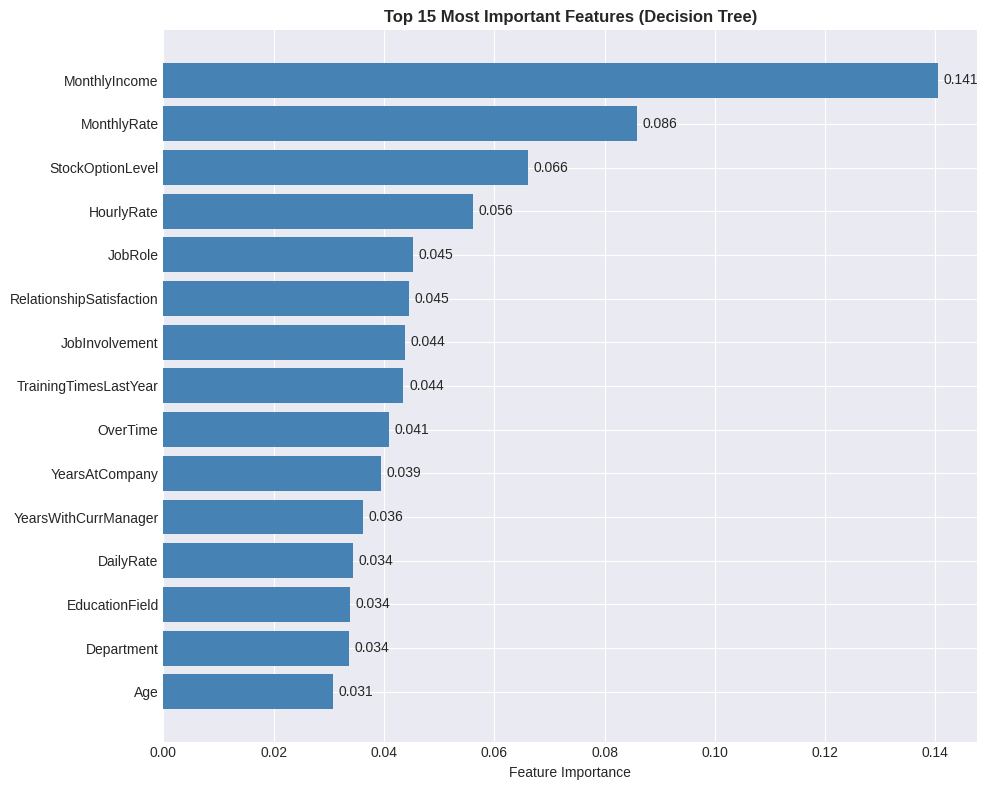

In [ ]:
#7.feature imporatnce analysis
# Feature importance from Decision Tree
feature_importance = pd.DataFrame({
    'feature': X_scaled.columns,
    'importance': dt.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features (Decision Tree):")
print(feature_importance.head(10))

# Visualize feature importance
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'], color='steelblue')
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 15 Most Important Features (Decision Tree)', fontweight='bold')
plt.gca().invert_yaxis()

# Add value labels
for i, v in enumerate(top_features['importance']):
    plt.text(v + 0.001, i, f'{v:.3f}', va='center')

plt.tight_layout()
plt.show()




In [ ]:
#final summmary
print("\n1. Dataset Overview:")
print(f"   - Total samples: {len(df)}")
print(f"   - Features: {X.shape[1]}")
print(f"   - Target classes: 2 (Attrition: Yes/No)")
print(f"   - Class distribution: Imbalanced (Ratio ~{class_distribution[0]/class_distribution[1]:.1f}:1)")

print("\n2. Best Performing Model:")
best_model = comparison_df.loc[comparison_df['Accuracy'].idxmax()]
print(f"   - Model: {best_model['Model']}")
print(f"   - Accuracy: {best_model['Accuracy']:.4f}")
print(f"   - Precision: {best_model['Precision']:.4f}")
print(f"   - Recall: {best_model['Recall']:.4f}")

print("\n3. Key Insights:")
print("   - The dataset shows significant class imbalance")
print("   - Feature scaling improved model performance")
print("   - Most important features for prediction are related to:")
print(f"     • {feature_importance.iloc[0]['feature']}")
print(f"     • {feature_importance.iloc[1]['feature']}")
print(f"     • {feature_importance.iloc[2]['feature']}")

print("\n4. Model Performance Ranking:")
for i, row in comparison_df.sort_values('Accuracy', ascending=False).iterrows():
    print(f"   {i+1}. {row['Model']}: {row['Accuracy']:.4f}")


1. Dataset Overview:
   - Total samples: 1677
   - Features: 34
   - Target classes: 2 (Attrition: Yes/No)
   - Class distribution: Imbalanced (Ratio ~7.4:1)

2. Best Performing Model:
   - Model: KNN
   - Accuracy: 0.8750
   - Precision: 0.8281
   - Recall: 0.8750

3. Key Insights:
   - The dataset shows significant class imbalance
   - Feature scaling improved model performance
   - Most important features for prediction are related to:
     • MonthlyIncome
     • MonthlyRate
     • StockOptionLevel

4. Model Performance Ranking:
   1. KNN: 0.8750
   3. Logistic Regression: 0.8671
   2. Decision Tree: 0.8274
   5. Neural Network: 0.8234
   4. Naive Bayes: 0.7877
